In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [20]:
df = pd.read_csv(r"C:\Users\keert\Projects_of_me(DATA_SCIENCE)\weather_prediction\seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [33]:
df.drop("date", axis=1, inplace=True)

In [21]:
df.info()
df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


0

In [11]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [12]:
#Preparing Data for Classification

X = df.drop("weather" ,axis=1)
y = df["weather"]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [22]:
#Grid Search and Random Forest

from sklearn.model_selection import GridSearchCV;
from sklearn.ensemble import RandomForestClassifier

In [23]:
n_est=np.arange(30,60)      ## You can try a wider range but n_est for the best accuracy_score is about 50
max_feat = np.arange(1,10)
bootstrap_sec = [True]
oob = [True, False]

In [24]:
random_forest = RandomForestClassifier()

In [25]:
grid = GridSearchCV(random_forest, parameters, error_score="raise")

In [26]:
grid.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [27]:
grid.best_estimator_, grid.best_params_

(RandomForestClassifier(max_features=1, n_estimators=47),
 {'bootstrap': True,
  'max_features': 1,
  'n_estimators': 47,
  'oob_score': False})

In [28]:
weather_pred = grid.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

              precision    recall  f1-score   support

     drizzle       0.25      0.14      0.18         7
         fog       0.40      0.17      0.24        23
        rain       0.98      0.89      0.94       130
        snow       1.00      0.50      0.67         4
         sun       0.77      0.95      0.85       129

    accuracy                           0.84       293
   macro avg       0.68      0.53      0.58       293
weighted avg       0.83      0.84      0.82       293
 



<Figure size 2400x1600 with 0 Axes>

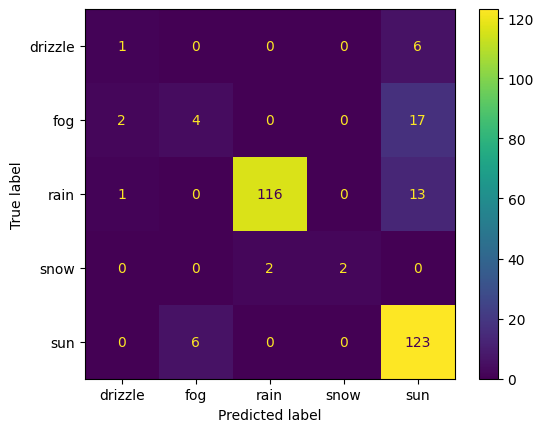

<Figure size 2400x1600 with 0 Axes>

In [30]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
print(classification_report(y_test, weather_pred), "\n")
plt.figure(figsize=(12,8), dpi=200)

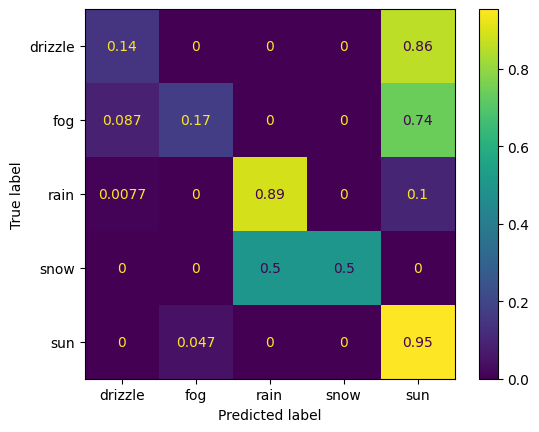

In [31]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, normalize="true")

In [34]:
# clearing more
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [35]:
new_df = df.drop(df[df['weather'].isin(["fog","drizzle"])].index,axis=0)

In [36]:
new_df.head()

,precipitation,temp_max,temp_min,wind,weather
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain
5,2.5,4.4,2.2,2.2,rain


In [37]:
X = new_df.drop("weather" ,axis=1)
y = new_df["weather"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [38]:
random_forest = RandomForestClassifier()

In [39]:
grid = GridSearchCV(random_forest, parameters, error_score="raise")

In [40]:
grid.fit(X_train, y_train)

GridSearchCV(error_score='raise', estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'n_estimators': array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
       47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'oob_score': [True, False]})

In [41]:
weather_pred = grid.predict(X_test)

              precision    recall  f1-score   support

        rain       0.97      0.92      0.95       119
        snow       0.00      0.00      0.00         1
         sun       0.94      0.99      0.96       142

    accuracy                           0.95       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.95      0.95      0.95       262
 



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2400x1600 with 0 Axes>

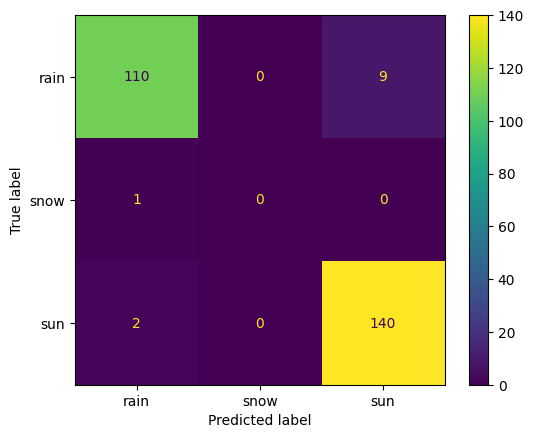

<Figure size 2400x1600 with 0 Axes>

In [42]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)
print(classification_report(y_test, weather_pred), "\n")
plt.figure(figsize=(12,8), dpi=200)